# 프로젝트 : 나랑 닮은 연예인 찾아보자 

## STEP1. 얼굴인식
샘플이미지 불러오기

In [ ]:
import os 

dir_path = '/content/drive/MyDrive/aiffel/face_embedding/project'
file_list = os.listdir(dir_path)

file_list[:5]

['시우민.jpg', 'obama.jpg', 'clinton.jpeg', 'trump.jpg', '고창석.jpeg']

샘플 이미지의 `me.jpg`를 불러온 후 얼굴을 `face_recognition.face_locations`를 사용해 찾아줌

In [ ]:
pip install face_recognition

In [ ]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img

박스를 찾게 되면 임베딩 추출 할 이미지를 만들기 위해 잘라줌 

In [ ]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

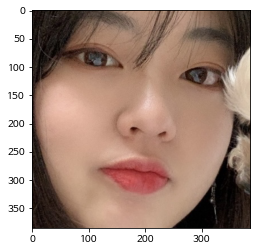

In [ ]:
image_path = '/content/drive/MyDrive/aiffel/face_embedding/project/me.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## STEP2. FaceNet

딕셔너리 keyerror 방지하기 위해 파일 저장방식 NFC로 지정

In [ ]:
from unicodedata import normalize

def list_files(dir_path):
  nfd_file_list = os.listdir(dir_path)

  file_list = []
  for nfd_file in nfd_file_list:
    file = normalize("NFC", nfd_file)
    file_list.append(file)
  return file_list
file_list = list_files(dir_path)

In [ ]:
dir_path = '/content/drive/MyDrive/aiffel/face_embedding/project/'
file_list = os.listdir(dir_path)

file_list[:5]

['시우민.jpg', 'obama.jpg', 'clinton.jpeg', 'trump.jpg', '고창석.jpeg']

`face_recognition.face_encodings()`를 사용해 얼굴 임베딩 벡터 구함

In [ ]:
image_file = os.path.join(dir_path, 'me.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.07049313,  0.05683836,  0.01423346, -0.09899547, -0.11271358,
        -0.09396882, -0.12021219, -0.10519958,  0.10784433, -0.1517956 ,
         0.15921409, -0.1202442 , -0.16564557, -0.05468887, -0.04593953,
         0.2326515 , -0.17020908, -0.18668753, -0.02760581, -0.01084469,
         0.08657952,  0.02941594, -0.02872453,  0.10489137, -0.13120253,
        -0.31588644, -0.10109666, -0.06630256, -0.05362293, -0.04484794,
         0.0295173 ,  0.10439312, -0.16920888, -0.00228571,  0.05694656,
         0.10481562,  0.04466796, -0.06675572,  0.16033623, -0.03384467,
        -0.33362263,  0.06105307,  0.11695325,  0.24710429,  0.15102164,
        -0.00685333,  0.00382791, -0.1807262 ,  0.12551713, -0.12478406,
         0.02580227,  0.13595112,  0.02014982,  0.05139919,  0.03206879,
        -0.11192376,  0.11343783,  0.13002545, -0.16172852, -0.02576487,
         0.09538235, -0.0794269 ,  0.03177234, -0.09858932,  0.23751548,
         0.05558278, -0.0993352 , -0.20950714,  0.1

In [ ]:
def get_face_embedding_dict(dir_path):
    file_list = list_files(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [ ]:
embedding_dict = get_face_embedding_dict(dir_path)

## STEP3. 얼굴 임베딩 사이의 거리 측정

`np.linalg.norm`를 활용해 두 사람의 얼굴 임베딩 사이 거리(L2 distance)를 구하는 `get_distance()` 함수 만들기 

In [ ]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('문재인', 'me')

0.6726183565565157

## STEP4. 가장 닮은꼴 얼굴 찾아보기 

* `def get_cropped_face(image_file)` : 이미지 파일에서 얼굴 영역을 가져오는 함수

* `def get_face_embedding(face)` : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수

* `def get_face_embedding_dict(dir_path)` : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

* `def get_distance(name1, name2)` : 두 이미지(사람 이름) 사이의 임베딩 벡터 거리를 구하는 함수

In [ ]:
def get_nearest_face(name, top=5): 
    pass
get_nearest_face('me')

In [ ]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('me')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [ ]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    return sorted_faces, sort_key_func

나와 가장 닮은 사람은?

In [ ]:
sorted_faces, sort_key_func = get_nearest_face('me')

순위 1 : 이름(우기), 거리(0.3540587309097101)
순위 2 : 이름(사쿠라), 거리(0.3548944138150969)
순위 3 : 이름(리아), 거리(0.36611962561073375)
순위 4 : 이름(아이즈원민주), 거리(0.3685565737202869)
순위 5 : 이름(트와이스쯔위), 거리(0.3716935054825558)


## 시각화 

한글 깨짐 현상 해결 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm !/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

나와 닮은 TOP 5 연예인 이름 list 저장

In [ ]:
name_list = []
for idx in range(1,6):
  new_path = str(dir_path+sorted_faces[idx][0]+".jpg")
  path, files = os.path.split(new_path)
  name,  ext= os.path.splitext(files)
  name_list.append(name)
name_list

['우기', '사쿠라', '리아', '아이즈원민주', '트와이스쯔위']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


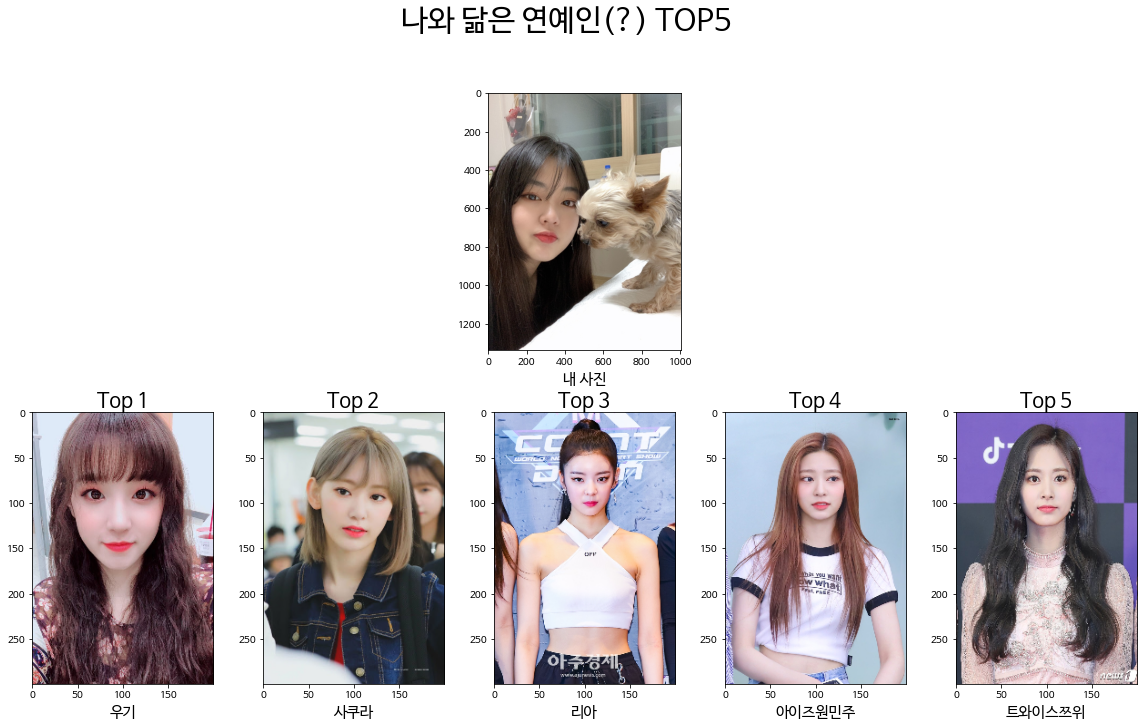

In [ ]:
import cv2

plt.figure(figsize=(20, 11))


for idx, top_img_num in enumerate(sorted_faces[1:6]):

  top_img = cv2.imread(dir_path+sorted_faces[idx+1][0]+".jpg")
  top_img = cv2.resize(top_img, (200, 300))
  top_img = cv2.cvtColor(top_img, cv2.COLOR_BGR2RGB)
  plt.subplot(2, 5, idx+6)
  plt.subplot
  plt.imshow(top_img)
  plt.title('Top {}'.format(idx+1), fontsize=20)
  plt.suptitle('나와 닮은 연예인(?) TOP5', fontsize=30)
  plt.xlabel('{}'.format(name_list[idx]), fontsize=15)
  plt.subplot(2, 5, 3)
  my_img = cv2.imread(image_path)
  my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB)
  plt.imshow(my_img)
  plt.xlabel('내 사진', fontsize=15)

# 회고 

이번 프로젝트는 코딩하는 과정은 LMS에서 배운대로 따라가면 되기 때문에 그렇게 어렵지 않았다. 하지만 데이터를 가져오고 얼굴인식이 되지 않는 이미지에 대한 처리가 어려웠기 때문에 인식이 되지 않는 이미지는 삭제하고 진행하였다. 

그리고 `plt`을 사용해 시각화를 진행하는 부분이 어려웠다. subplot을 그릴 때, xlabel로 바로 추가하고 싶었지만 잘 되지않아, list로 따로 뽑았다. 돌고돌아 마지막 시각화를 했기 때문에 더 공부해서 조금 더 간단한 코드를 만들고 싶다. 

그리고 마지막 MatplotlibDeprecationWarning을 없애고 싶어  
```python
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('equal')
plt.axis('scaled')
```
3가지 코드를 넣어 봤지만 해결하지 못했다. 해결 방법도 앞으로 알아가고 싶다. 


_참고_

[https://asthtls.tistory.com/1011](https://asthtls.tistory.com/1011)

[matplotlib의 기본 사용법 및 다른 시각화 라이브러리](https://soooprmx.com/matplotlib%EC%9D%98-%EA%B8%B0%EB%B3%B8-%EC%82%AC%EC%9A%A9%EB%B2%95-%EB%B0%8F-%EB%8B%A4%EB%A5%B8-%EC%8B%9C%EA%B0%81%ED%99%94-%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/)

[구글 코랩(colab) 한글 깨짐 현상 해결방법](https://teddylee777.github.io/colab/colab-korean)

[파이썬의 파일 확장자 알아보기-splitext 함수](https://redcow77.tistory.com/371)